<a href="https://colab.research.google.com/github/JozefSL/pyNotes/blob/main/pymc3/pymc42withPYMCvHiro3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
from google.colab import drive
import os
import sqlite3
import pymc as pm
import seaborn as sns
import statsmodels.formula.api as smf
from matplotlib import rcParams
import numpy as np
import arviz as az
import matplotlib.pyplot as plt


In [ ]:
#import w
# %load_ext watermark
%pip install watermark

In [60]:
%load_ext watermark

In [69]:
%watermark --iversions

pandas     : 1.3.5
pymc       : 4.1.4
sqlite3    : 2.6.0
matplotlib : 3.2.2
statsmodels: 0.12.2
numpy      : 1.21.6
arviz      : 0.12.1
seaborn    : 0.11.2
google     : 2.0.3



In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [70]:
os.listdir('/content/drive/MyDrive')

['Colab Notebooks', 'permData.csv', 'Data', 'Copy of pymc3on42.ipynb']

In [100]:
data = pd.read_csv('/content/drive/MyDrive/permData.csv')

In [101]:
M_names = data.MHB.unique()
M_count = len(data.MHB.unique())

M_names = pd.DataFrame(M_names, columns=['MHB'])
M_names = M_names.reset_index()
M_names.rename(columns={'index' : 'MHBn'}, inplace=True)

In [102]:
M_names.head()

,MHBn,MHB
0,0,DM82qj
1,1,DM82oe
2,2,DM81pn
3,3,DM81qn
4,4,DM81pm


In [103]:
data = data.merge(M_names, on=['MHB'], how='left')

In [104]:
data = data.set_index('API15')

In [105]:
data

,feDate,drill_type,WaterGal,SandLB,TVD,maxPo,maxPg,M6o,M6g,MHB,BasinID,WB,LL,H2O_C,SAND_C,LL_C,MHBn
API15,,,,,,,,,,,,,,,,,
142003456720000,10/25/2013,H,894474,782400,9013,329,56,29589,4805,DM82qj,42,8988,3949,-4.731363,-5.950610,-1.608904,0
142003457220000,12/24/2013,H,141687,2691515,7720,125,151,14767,16987,DM82oe,42,12464,5010,-5.484150,-4.041495,-0.547904,1
142103359090000,12/20/2013,H,236615,258069,4010,1,25,87,2783,DM81pn,42,7150,2590,-5.389222,-6.474941,-2.967904,2
142103359240000,6/12/2013,H,2950361,1505353,5603,117,72,14244,8123,DM81qn,42,9951,4161,-2.675476,-5.227657,-1.396904,3
142103361080000,6/25/2013,H,2303015,1259599,6215,62,161,5945,16837,DM81qn,42,9654,3754,-3.322822,-5.473411,-1.803904,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142475364350000,8/6/2013,H,1329216,1937196,10927,726,1188,72806,112550,DM81hn,42,16381,4388,-4.296621,-4.795814,-1.169904,345
142475364690000,11/5/2013,H,758898,1135020,11073,471,794,51337,111794,DM81go,42,15415,3805,-4.866939,-5.597990,-1.752904,283
142475364800000,11/8/2013,H,1500876,2006319,11495,293,358,28324,36250,DM81hp,42,13123,1296,-4.124961,-4.726691,-4.261904,176


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1207 entries, 142003456720000 to 142495334950000
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feDate      1207 non-null   object 
 1   drill_type  1207 non-null   object 
 2   WaterGal    1207 non-null   int64  
 3   SandLB      1207 non-null   int64  
 4   TVD         1207 non-null   int64  
 5   maxPo       1207 non-null   int64  
 6   maxPg       1207 non-null   int64  
 7   M6o         1207 non-null   int64  
 8   M6g         1207 non-null   int64  
 9   MHB         1207 non-null   object 
 10  BasinID     1207 non-null   int64  
 11  WB          1207 non-null   int64  
 12  LL          1207 non-null   int64  
 13  H2O_C       1207 non-null   float64
 14  SAND_C      1207 non-null   float64
 15  LL_C        1207 non-null   float64
 16  MHBn        1207 non-null   int64  
dtypes: float64(3), int64(11), object(3)
memory usage: 169.7+ KB


In [141]:
data1 = data[['maxPg', 'maxPo', 'LL_C', 'H2O_C', 'SAND_C']].copy()
data1['WSL'] = (data1['H2O_C'] +data['SAND_C'])/data['LL_C']

data1.describe().round(3)

,maxPg,maxPo,LL_C,H2O_C,SAND_C,WSL
count,1207.000,1207.000,1207.000,1207.000,1207.000,1207.000
mean,851.324,339.211,-0.000,0.000,-0.000,3.748
std,999.143,244.092,1.964,3.619,9.580,26.616
min,0.000,1.000,-5.557,-5.595,-6.733,-237.693
25%,250.000,171.500,-1.410,-3.440,-4.334,1.413
50%,532.000,289.000,-0.735,-0.259,-1.485,3.368
75%,1026.000,459.000,1.861,3.031,1.570,5.346
max,9518.000,2248.000,6.292,12.973,113.852,674.709


In [142]:
#data1['maxPo.s'] = (data1['maxPo']-data1['maxPo'].mean())/(2*data1['maxPo'].std())
sData = (data1-data1.mean())/(2*data1.std()).copy()


In [143]:
sData.describe().round(3)

,maxPg,maxPo,LL_C,H2O_C,SAND_C,WSL
count,1207.000,1207.000,1207.000,1207.000,1207.000,1207.000
mean,-0.000,0.000,-0.000,0.000,-0.000,-0.000
std,0.500,0.500,0.500,0.500,0.500,0.500
min,-0.426,-0.693,-1.414,-0.773,-0.351,-4.536
25%,-0.301,-0.344,-0.359,-0.475,-0.226,-0.044
50%,-0.160,-0.103,-0.187,-0.036,-0.078,-0.007
75%,0.087,0.245,0.474,0.419,0.082,0.030
max,4.337,3.910,1.602,1.793,5.942,12.605


In [144]:
sData.head()

,maxPg,maxPo,LL_C,H2O_C,SAND_C,WSL
API15,,,,,,
142003456720000,-0.398003,-0.020917,-0.409518,-0.653742,-0.310560,0.054308
142003457220000,-0.350462,-0.438792,-0.139459,-0.757756,-0.210924,0.256187
142103359090000,-0.413516,-0.692794,-0.755428,-0.744639,-0.337925,0.004680
142103359240000,-0.389996,-0.455179,-0.355557,-0.369676,-0.272830,0.035867
142103361080000,-0.345458,-0.567841,-0.459152,-0.459121,-0.285655,0.021188


In [145]:
wd = pd.merge(sData, data[['MHBn']], how='left', left_index=True, right_index=True)

In [146]:
wd.head()

,maxPg,maxPo,LL_C,H2O_C,SAND_C,WSL,MHBn
API15,,,,,,,
130005291450000,-0.404008,-0.498195,-0.546966,-0.566850,-0.262686,0.009449,235
130005291510000,-0.384992,-0.401920,0.247176,-0.365721,-0.351393,-0.251869,139
130005292040000,-0.396001,-0.502292,-0.500387,-0.612530,-0.231294,0.014295,235
130015379260000,-0.087237,0.622282,0.031586,-0.325761,-0.219707,-1.064602,271
130015384340000,0.066395,0.638670,-0.434208,-0.362987,-0.245602,0.010337,202


In [147]:
MHB_idx = wd.MHBn.values

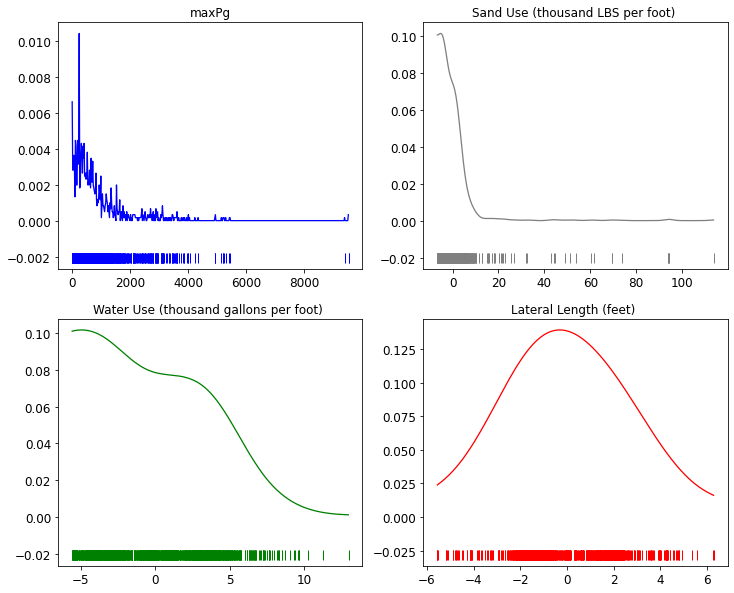

In [40]:
fig = plt.figure(figsize = (12,10))

ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title('maxPg')
az.plot_kde(data['maxPg'],textsize=12, plot_kwargs={'color': 'b'}, rug=True, bw=2)

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title('Sand Use (thousand LBS per foot) ')
az.plot_kde(data['SAND_C'],textsize=12, plot_kwargs={'color': 'gray'}, rug=True, bw=2)

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title('Water Use (thousand gallons per foot) ')
az.plot_kde(data['H2O_C'],textsize=12, plot_kwargs={'color': 'green'}, rug=True, bw=2)

ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title('Lateral Length (feet) ')
az.plot_kde(data['LL_C'],textsize=12, plot_kwargs={'color': 'red'}, rug=True, bw=2);

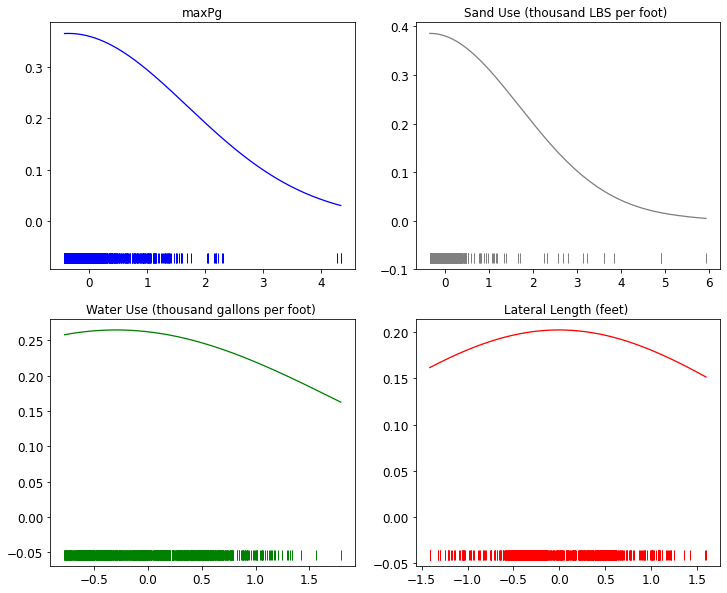

In [39]:
fig = plt.figure(figsize = (12,10))

ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title('maxPg')
az.plot_kde(sData['maxPg'],textsize=12, plot_kwargs={'color': 'b'}, rug=True, bw=2)

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title('Sand Use (thousand LBS per foot) ')
az.plot_kde(sData['SAND_C'],textsize=12, plot_kwargs={'color': 'gray'}, rug=True, bw=2)

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title('Water Use (thousand gallons per foot) ')
az.plot_kde(sData['H2O_C'],textsize=12, plot_kwargs={'color': 'green'}, rug=True, bw=2)

ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title('Lateral Length (feet) ')
az.plot_kde(sData['LL_C'],textsize=12, plot_kwargs={'color': 'red'}, rug=True, bw=2);

In [41]:
ls_1 = smf.ols('maxPg ~ H2O_C + SAND_C + LL_C ', data=sData).fit()
ls_1.summary(alpha=0.11)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  maxPg   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.818
Date:                Thu, 20 Oct 2022   Prob (F-statistic):              0.142
Time:                        13:03:37   Log-Likelihood:                -872.80
No. Observations:                1207   AIC:                             1754.
Df Residuals:                    1203   BIC:                             1774.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.055      0.945]
------------------------------------------------------------------------------
Intercept  -9.107e-18      0.014  -6.33e-16      1.000      -0.023       0.023
H2O_C          0.0820      0.049      1.683      0.093       0.004       0.160
SAND_C        -0.0053      0.033     -0.162      0.871      -0.058       0.047
LL_C          -0.1073      0.046     -2.324      0.020      -0.181      -0.033
==============================================================================
Omnibus:                      871.125   Durbin-Watson:                   1.339
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16081.596
Skew:                           3.158   Prob(JB):                         0.00
Kurtosis:                      19.729   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
wd.tail()

,maxPg,maxPo,LL_C,H2O_C,SAND_C,MHBn
API15,,,,,,
142495335070000,-0.426027,-0.655923,-0.548748,-0.564200,-0.216184,336
142495335130000,0.355643,1.171255,0.167252,-0.044827,-0.086892,289
142495335260000,-0.383991,-0.539163,-0.357085,-0.353559,-0.261713,363
142501359990000,-0.426027,-0.106950,-0.452534,-0.553473,-0.302157,290
142501361930000,-0.426027,-0.682552,-1.041523,-0.513159,-0.273220,364


In [118]:
with pm.Model() as model_vi1:
# Priors
    μ_α = pm.Normal('μ_α', mu=2150, sigma=100)
    σ_α = pm.Normal('σ_α', mu=1500, sigma=100)
    # Random intercepts
    α = pm.Normal('α', mu=μ_α, sigma=100, shape=M_count)
    # Common slope
    βw = pm.Normal('βw', mu=20, sigma=100)
    βs = pm.Normal('βs', mu=-0.25, sigma=100)
    βh = pm.Normal('βh', mu=90, sigma=100)
   
    # Model error
    ϵ = pm.Normal('ϵ', mu=1100, sigma=100)

    μ = α[MHB_idx] + βw*wd.H2O_C + βs*wd.SAND_C + βh*wd.LL_C
    # Data likelihood
    maxPg = pm.Normal('maxPg', μ, ϵ, observed=wd.maxPg)

    trace_vi1 = pm.sample(2000, tune=1000, cores=2)

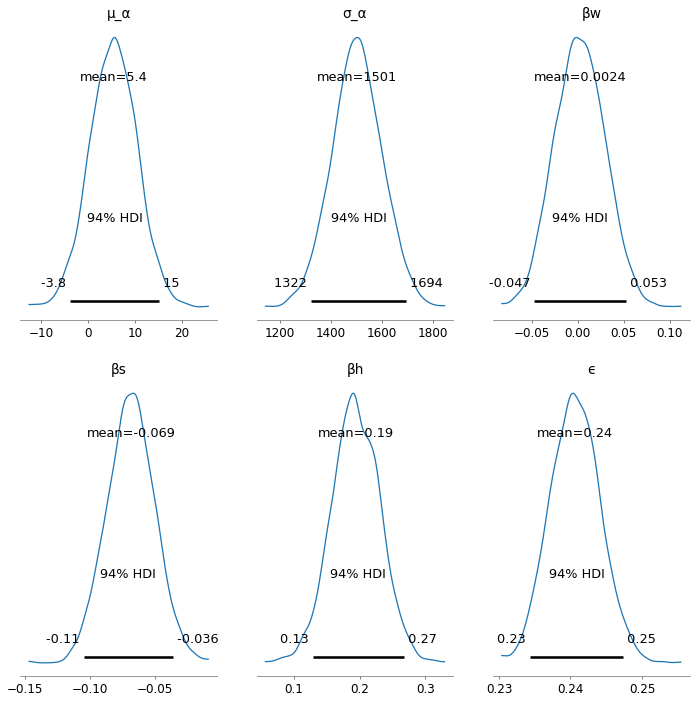

In [119]:
pm.plot_posterior(trace_vi1, var_names=['μ_α', 'σ_α', 'βw', 'βs', 'βh', 'ϵ'],
                  figsize=(12,12), textsize=12);

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ_α,5.42,5.03,-3.75,15.25,0.05,0.06,8926.0,2730.0,1.0
σ_α,1501.49,97.95,1322.45,1693.65,1.06,0.75,8563.0,2805.0,1.0
α[0],-0.36,0.12,-0.58,-0.13,0.00,0.00,6286.0,3139.0,1.0
α[1],-0.18,0.14,-0.44,0.08,0.00,0.00,8188.0,2800.0,1.0
α[2],-0.30,0.06,-0.40,-0.20,0.00,0.00,5340.0,2895.0,1.0
...,...,...,...,...,...,...,...,...,...
α[396],-0.32,0.25,-0.82,0.14,0.00,0.00,9564.0,2776.0,1.0
βw,0.00,0.03,-0.05,0.05,0.00,0.00,2361.0,2522.0,1.0
βs,-0.07,0.02,-0.10,-0.04,0.00,0.00,3115.0,3105.0,1.0
βh,0.19,0.04,0.13,0.27,0.00,0.00,982.0,1689.0,1.0


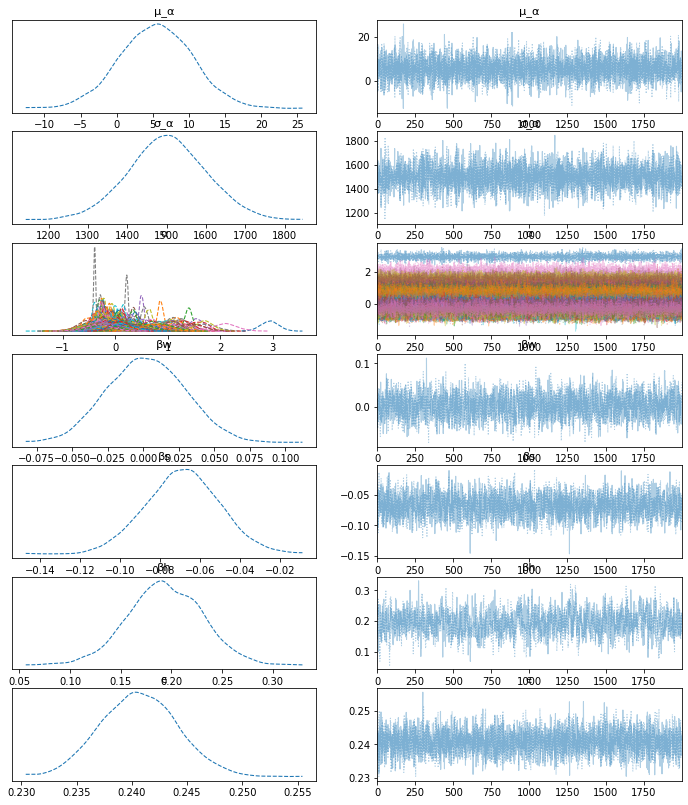

In [120]:
pm.plot_trace(trace_vi1, compact=True, combined=True)
pm.summary(trace_vi1).round(2)

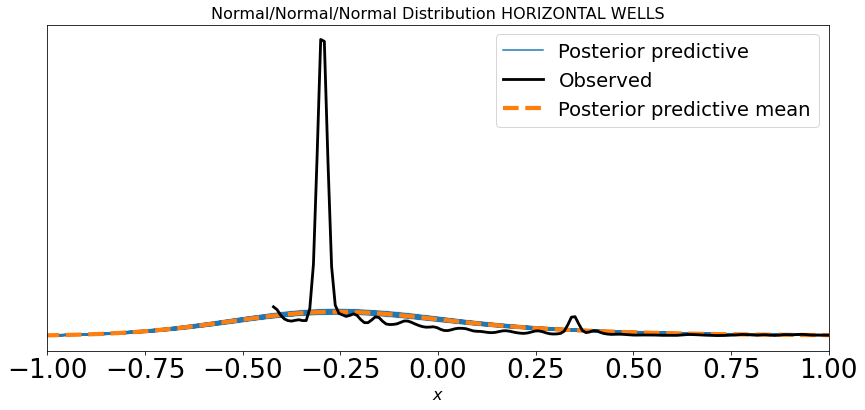

In [123]:
ppc1 = pm.sample_posterior_predictive(trace=trace_vi1, model=model_vi1)
az.plot_ppc(ppc1, alpha=0.03, figsize=(14, 6)) #, backend="bokeh")
plt.xlim(-1, 1)
plt.title("Normal/Normal/Normal Distribution HORIZONTAL WELLS", fontsize=16)
plt.xlabel('$x$', fontsize=16);

In [128]:
with pm.Model() as modelHiro_v1:
# Priors
    μ_α = pm.Normal('μ_α', mu=0, sigma=0.5)
    σ_α = pm.Normal('σ_α', mu=0, sigma=0.5)
    # Random intercepts
    α = pm.Normal('α', mu=μ_α, sigma=0.5, shape=M_count)
    # Common slope
    #βw = pm.Normal('βw', mu=20, sigma=100)
    #βs = pm.Normal('βs', mu=-0.25, sigma=100)
    βh = pm.Normal('βh', mu=0, sigma=0.5, shape=M_count)
   
    # Model error
    ϵ = pm.Normal('ϵ', mu=1100, sigma=100)

    μ = α[MHB_idx] + βh[MHB_idx]*wd.LL_C
    # Data likelihood
    maxPg = pm.Normal('maxPg', μ, ϵ, observed=wd.maxPg)

    traceHiro_v1 = pm.sample(2000, tune=1000, cores=2)

/usr/local/lib/python3.7/dist-packages/arviz/plots/plot_utils.py:277: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (400) in plot_posterior, generating only 40 plots
  UserWarning,


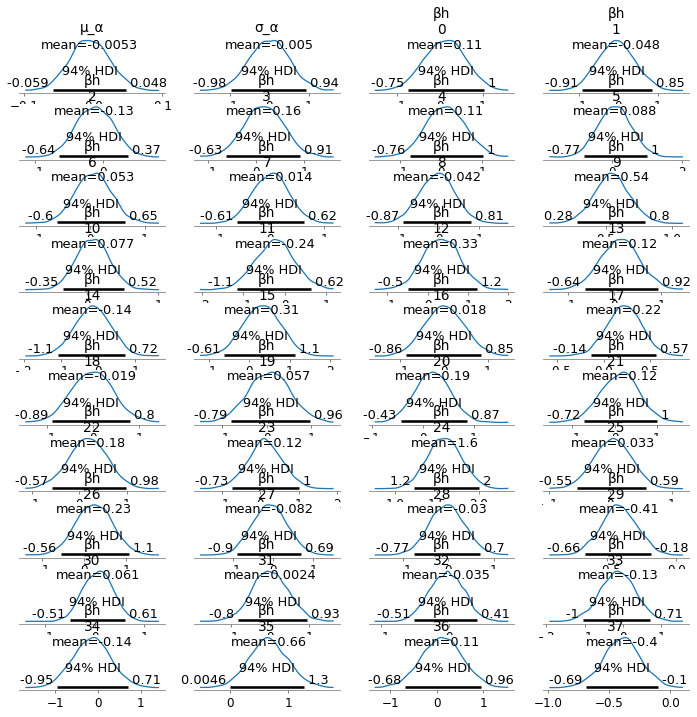

In [129]:
pm.plot_posterior(traceHiro_v1, var_names=['μ_α', 'σ_α', 'βh', 'ϵ'],
                  figsize=(12,12), textsize=12);

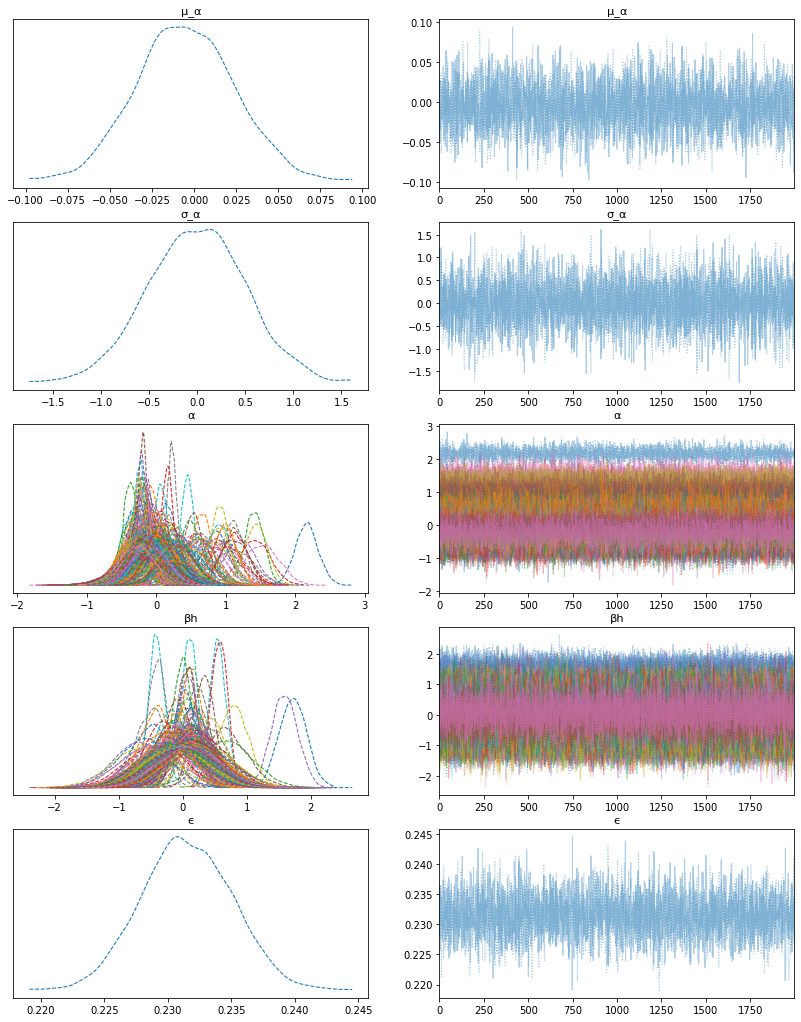

In [139]:
pm.plot_trace(traceHiro_v1, compact=True, combined=True, figsize=(14,18));

In [136]:
pm.summary(traceHiro_v1).round(2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ_α,-0.00,0.03,-0.06,0.05,0.00,0.00,4578.0,3498.0,1.0
σ_α,-0.00,0.51,-0.98,0.94,0.01,0.01,8332.0,2862.0,1.0
α[0],-0.35,0.18,-0.71,-0.05,0.00,0.00,5018.0,3392.0,1.0
α[1],-0.20,0.17,-0.51,0.11,0.00,0.00,4728.0,3054.0,1.0
α[2],-0.37,0.09,-0.55,-0.20,0.00,0.00,5986.0,2812.0,1.0
...,...,...,...,...,...,...,...,...,...
βh[393],0.01,0.47,-0.94,0.83,0.01,0.01,5370.0,2839.0,1.0
βh[394],0.04,0.48,-0.83,0.94,0.01,0.01,5340.0,3412.0,1.0
βh[395],-0.04,0.48,-0.98,0.82,0.01,0.01,6520.0,3249.0,1.0
βh[396],0.12,0.47,-0.72,0.99,0.01,0.01,6138.0,2726.0,1.0


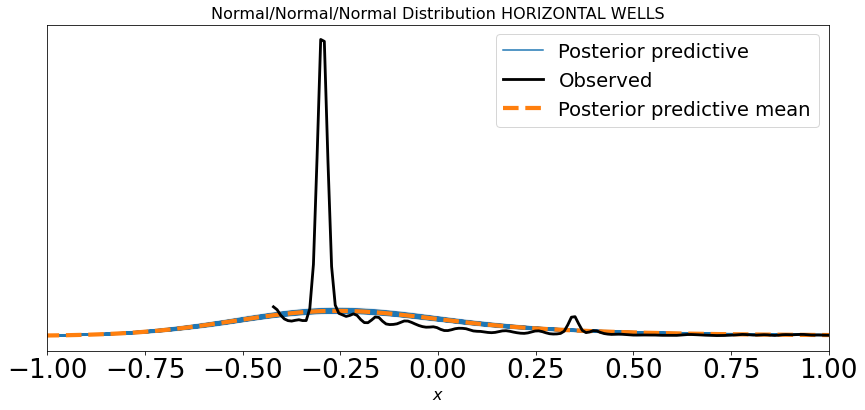

In [131]:
ppcH1 = pm.sample_posterior_predictive(trace=traceHiro_v1, model=modelHiro_v1)
az.plot_ppc(ppcH1, alpha=0.03, figsize=(14, 6)) #, backend="bokeh")
plt.xlim(-1, 1)
plt.title("Normal/Normal/Normal Distribution HORIZONTAL WELLS", fontsize=16)
plt.xlabel('$x$', fontsize=16);

In [151]:
from numpy.random.mtrand import gamma
with pm.Model() as modelHiro_v2:
# Priors
    μ_α = pm.Normal('μ_α', mu=0, sigma=0.5)
    σ_α = pm.Normal('σ_α', mu=0, sigma=0.5)
    
    α = pm.Normal('α', mu=μ_α, sigma=0.5, shape=M_count)
    
    
    β = pm.Normal('β', mu=0, sigma=0.5, shape=M_count)
    γ = pm.Normal('γ', mu=0, sigma=0.5)

# Model error
    ϵ = pm.Normal('ϵ', mu=1100, sigma=100)

    μ = α[MHB_idx] + (γ + β[MHB_idx]*wd.WSL)*wd.LL_C
# Data likelihood
    maxPg = pm.Normal('maxPg', μ, ϵ, observed=wd.maxPg)

    traceHiro_v2 = pm.sample(2000, tune=1000, cores=2)

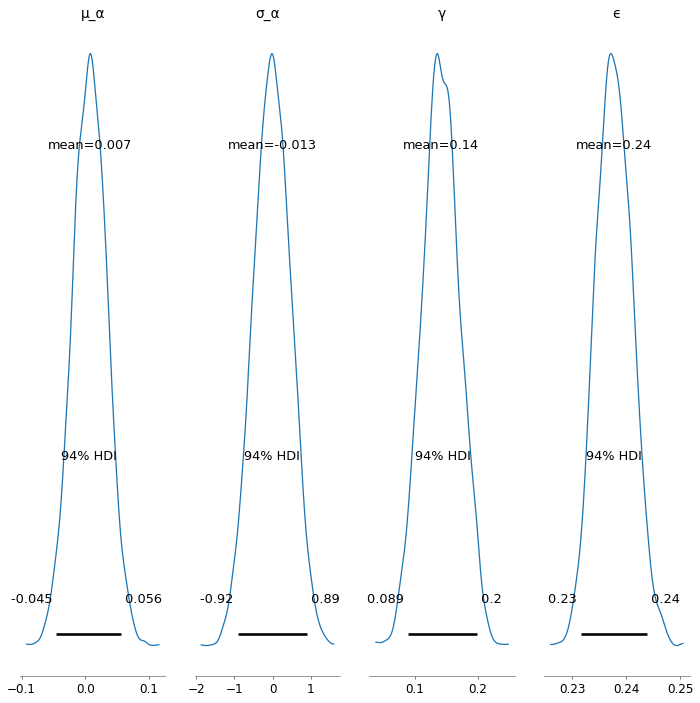

In [152]:
pm.plot_posterior(traceHiro_v2, var_names=['μ_α', 'σ_α', 'γ', 'ϵ'],
                  figsize=(12,12), textsize=12);

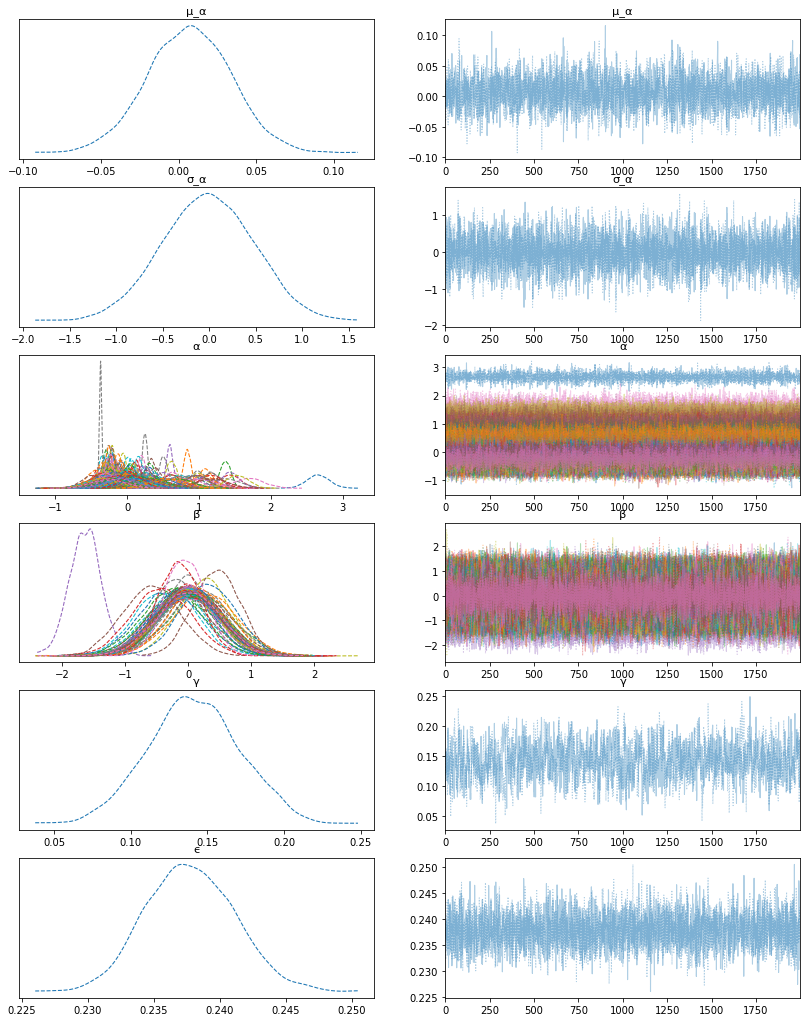

In [153]:
pm.plot_trace(traceHiro_v2, compact=True, combined=True, figsize=(14,18));

In [154]:
pm.summary(traceHiro_v2).round(2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ_α,0.01,0.03,-0.04,0.06,0.00,0.00,4506.0,2726.0,1.0
σ_α,-0.01,0.48,-0.92,0.89,0.00,0.01,9087.0,3060.0,1.0
α[0],-0.33,0.12,-0.56,-0.12,0.00,0.00,8005.0,2572.0,1.0
α[1],-0.16,0.13,-0.41,0.09,0.00,0.00,7324.0,2720.0,1.0
α[2],-0.30,0.05,-0.40,-0.20,0.00,0.00,6505.0,3023.0,1.0
...,...,...,...,...,...,...,...,...,...
β[394],0.00,0.51,-0.93,0.99,0.00,0.01,8664.0,2875.0,1.0
β[395],0.00,0.50,-0.99,0.88,0.01,0.01,7121.0,2700.0,1.0
β[396],0.01,0.50,-0.91,0.92,0.01,0.01,7953.0,3004.0,1.0
γ,0.14,0.03,0.09,0.20,0.00,0.00,1013.0,1440.0,1.0


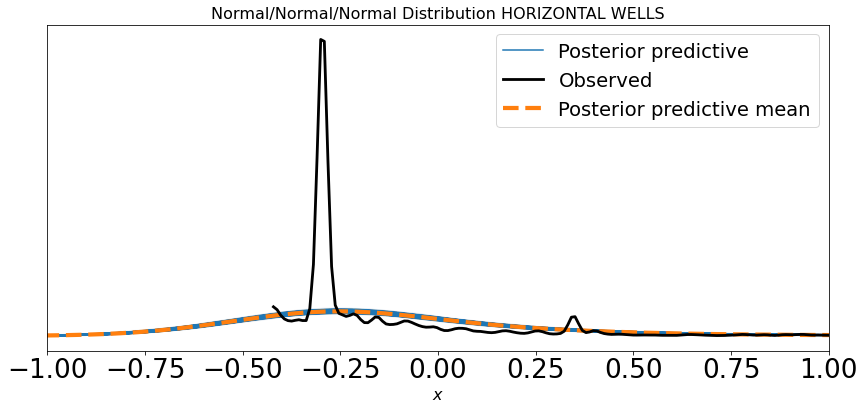

In [155]:
ppcH2 = pm.sample_posterior_predictive(trace=traceHiro_v2, model=modelHiro_v2)
az.plot_ppc(ppcH2, alpha=0.03, figsize=(14, 6)) #, backend="bokeh")
plt.xlim(-1, 1)
plt.title("Normal/Normal/Normal Distribution HORIZONTAL WELLS", fontsize=16)
plt.xlabel('$x$', fontsize=16);

In [ ]:
with pm.Model() as modelHiro_v3:
# Priors
    μ_α = pm.Normal('μ_α', mu=0, sigma=0.5)
    σ_α = pm.Normal('σ_α', mu=0, sigma=0.5)
    α = pm.Normal('α', mu=μ_α, sigma=0.5, shape=M_count)
        
    β = pm.Normal('β', mu=0, sigma=0.5, shape=M_count)
    γ = pm.Normal('γ', mu=0, sigma=0.5)

    τ = pm.Normal('τ', mu=0, sigma=0.5, shape=Year_count)

# Model error
    ϵ = pm.Normal('ϵ', mu=1100, sigma=100)

    μ = α[MHB_idx] + τ[yy] + (γ[yy] + β[MHB_idx]*wd.WSL)*wd.LL_C
# Data likelihood
    maxPg = pm.Normal('maxPg', μ, ϵ, observed=wd.maxPg)

    traceHiro_v2 = pm.sample(2000, tune=1000, cores=2)

In [127]:


vi1_est = pd.Series(trace_vi1['α'].mean(axis=0), index=M_names)
vi1_se = pd.Series(trace_vi1['α'].std(axis=0), index=M_names)
order = vi1_est.sort_values(ascending=False).index

plt.figure(figsize=(10,8))

plt.scatter(range(len(vi1_est)), vi1_est[order])
for i, m, se in zip(range(len(vi1_est)), vi1_est[order], vi1_se[order]):
    plt.plot([i,i], [m-se, m+se], 'b-', alpha = 0.3)
plt.xlim(-10,410); plt.ylim(-1000,6000)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.ylabel('α estimate', fontsize=16); plt.xlabel('Ordered Block', fontsize=16);

KeyError: ignored

In [ ]:
# Varying Intercept Model, version ug
with pm.Model() as model_vi3:
    # Priors
    μ_α = pm.Normal('μ_α', mu=2125, sd=100)
    σ_α = pm.Normal('σ_α', mu=1725, sd=125)
    # Random intercepts
    α = pm.Gamma('α', mu=μ_α, sd=σ_α, shape=M_count)
    # Common slope
    βw = pm.Normal('βw', mu=18, sd=10)
    βs = pm.Normal('βs', mu=-0.25, sd=2)
    βh = pm.Normal('βh', mu=75, sd=25)
    
    # Model error
    ϵ = pm.Normal('ϵ', mu=1090,  sd=25)

    μ = μ = α[MHB_idx] + βw*wd.H2O_C + βs*wd.SAND_C + βh*wd.LL_C
    # Data likelihood
    maxPg = pm.Normal('maxPg', mu=μ, sd=ϵ, observed=wd.maxPg)
    
    trace_vi3 = pm.sample(2000, tune=1000, target_accept=0.90, cores=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, βh, βs, βw, α, σ_α, μ_α]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 96 seconds.
The number of effective samples is smaller than 25% for some parameters.


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


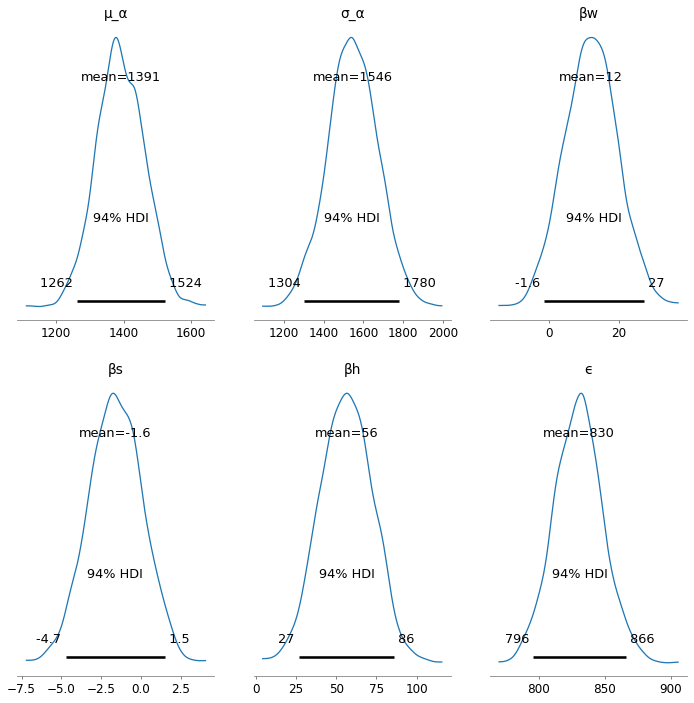

In [ ]:
pm.plot_posterior(trace_vi3, var_names=['μ_α', 'σ_α', 'βw', 'βs', 'βh', 'ϵ'],
                  figsize=(12,12), textsize=12);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a 

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ_α,1391.03,70.62,1261.71,1524.17,1.19,0.84,3534.0,2613.0,1.0
σ_α,1546.46,125.73,1303.85,1779.71,5.44,3.88,534.0,1122.0,1.0
βw,12.02,7.62,-1.55,27.25,0.12,0.09,3728.0,2956.0,1.0
βs,-1.59,1.68,-4.74,1.49,0.02,0.02,5088.0,2834.0,1.0
βh,56.20,16.25,26.74,86.13,0.29,0.20,3244.0,3225.0,1.0
...,...,...,...,...,...,...,...,...,...
α[392],590.27,490.26,0.18,1472.53,7.01,4.96,2656.0,1474.0,1.0
α[393],845.06,514.24,0.25,1710.91,9.83,6.95,1998.0,1088.0,1.0
α[394],680.12,527.99,0.10,1641.98,8.49,6.01,2185.0,1174.0,1.0
α[395],497.63,439.75,0.08,1324.87,6.05,4.28,3018.0,1699.0,1.0


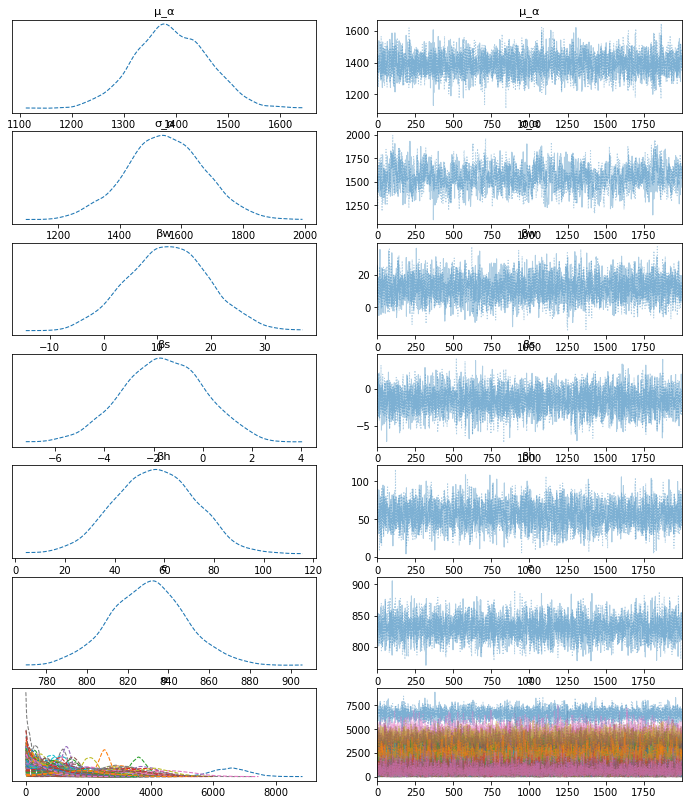

In [ ]:
pm.traceplot(trace_vi3, compact=True, combined=True)
pm.summary(trace_vi3).round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The function `kdeplot` from PyMC3 is just an alias for `plot_kde` from ArviZ. Please switch to `pymc3.plot_kde` or `arviz.plot_kde`.
  This is separate from the ipykernel package so we can avoid doing imports until


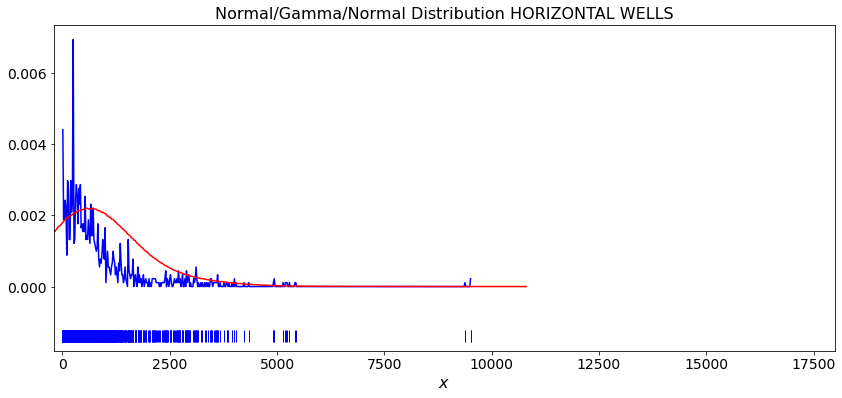

In [ ]:
ppc3 = pm.sample_posterior_predictive(trace_vi3, 4000, model_vi3)
rcParams['figure.figsize'] = 14,6
ax = pm.kdeplot(data['maxPg'], plot_kwargs={'color': 'blue'}, bw=3, rug=True)
az.plot_kde(ppc3['maxPg'], plot_kwargs={'color': 'red'}, ax=ax, bw=2)
plt.xlim(-200, 18000)
plt.title("Normal/Gamma/Normal Distribution HORIZONTAL WELLS", fontsize=16)
plt.xlabel('$x$', fontsize=16);

In [ ]:
az.r2_score(np.array(data.maxPg), ppc3['maxPg'])

r2        0.398440
r2_std    0.030767
dtype: float64

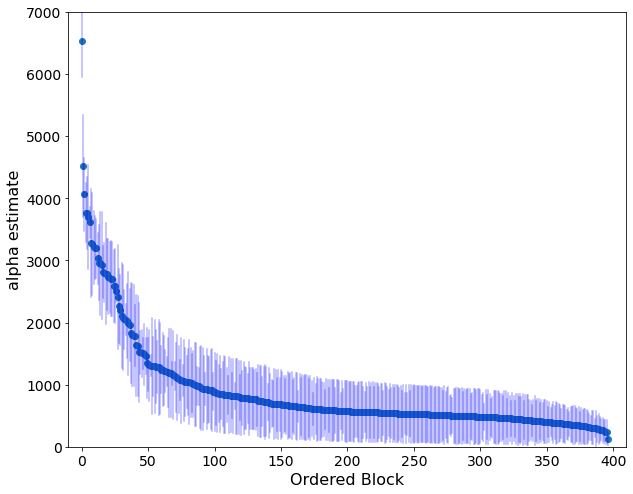

In [ ]:
vi3_est = pd.Series(trace_vi3['α'].mean(axis=0), index=M_names)
vi3_se = pd.Series(trace_vi3['α'].std(axis=0), index=M_names)
order = vi3_est.sort_values(ascending=False).index

plt.figure(figsize=(10,8))
plt.scatter(range(len(vi3_est)), vi3_est[order])
for i, m, se in zip(range(len(vi3_est)), vi3_est[order], vi3_se[order]):
    plt.plot([i,i], [m-se, m+se], 'b-', alpha = 0.3)
plt.xlim(-10,410); plt.ylim(0,7000)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.ylabel('alpha estimate', fontsize=16); plt.xlabel('Ordered Block', fontsize=16);

Multi-level Model Modifications

In [ ]:
maxPg_avg = pm.sample_posterior_predictive_w([trace_vi1, trace_vi3], samples=1000,
                                        models=[model_vi1, model_vi3])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The function `kdeplot` from PyMC3 is just an alias for `plot_kde` from ArviZ. Please switch to `pymc3.plot_kde` or `arviz.plot_kde`.
  


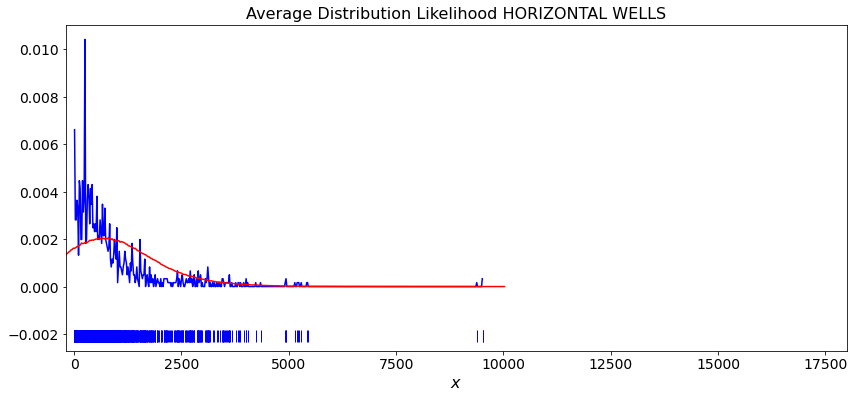

In [ ]:
rcParams['figure.figsize'] = 14,6
ax = pm.kdeplot(data['maxPg'], plot_kwargs={'color': 'blue'}, bw=2, rug=True)
az.plot_kde(maxPg_avg['maxPg'], plot_kwargs={'color': 'red'}, ax=ax, bw=2)
plt.xlim(-200, 18000)
plt.title("Average Distribution Likelihood HORIZONTAL WELLS", fontsize=16)
plt.xlabel('$x$', fontsize=16);

In [ ]:
az.r2_score(np.array(data.maxPg), maxPg_avg['maxPg'])

r2        0.346362
r2_std    0.031271
dtype: float64

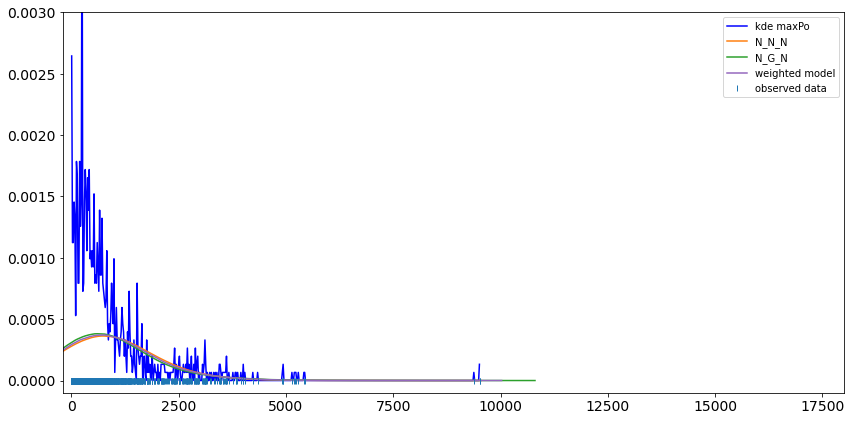

In [ ]:
_, ax = plt.subplots(figsize=(14,7))
az.plot_kde(data['maxPg'], plot_kwargs={'color': 'b'}, label='kde maxPo', bw=5)
az.plot_kde(ppc1['maxPg'], plot_kwargs={'color': 'C1'}, label='N_N_N', ax=ax)
az.plot_kde(ppc3['maxPg'], plot_kwargs={'color': 'C2'}, label='N_G_N', ax=ax)
#az.plot_kde(ppc5['maxPg'], plot_kwargs={'color': 'C3'}, label='TN_N_N', ax=ax)
az.plot_kde(maxPg_avg['maxPg'], plot_kwargs={'color': 'C4'}, label='weighted model', ax=ax)
plt.xlim(-200, 18000)
plt.plot(data['maxPg'], np.zeros_like(data['maxPg']), '|', label='observed data')
#plt.yticks([])
plt.ylim(-0.0001, 0.003)
plt.legend();

In [ ]:
cmp_df = az.compare({'model_ls':trace_ls, 'model_vi1':trace_vi1, 'model_vi3':trace_vi3},
                    method='BB-pseudo-BMA')
cmp_df

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:695: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated shape parameter of Pareto distribution is greater than 0.7 for "
Got error No model on context stack. trying to find log_likelihood in t

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model_vi3,0,-9763.023989,165.858967,0.000000,1.000000e+00,75.344064,0.000000,True,log
model_vi1,1,-9829.297033,163.729582,66.273044,8.983484e-11,66.927370,12.974083,True,log
model_ls,2,-10056.129336,14.441278,293.105347,1.865894e-80,72.505208,43.616563,True,log


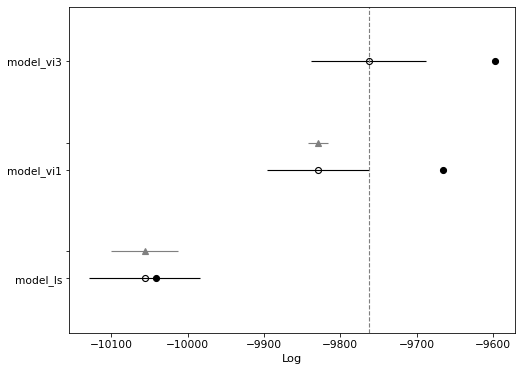

In [ ]:
az.plot_compare(cmp_df, figsize=(8,6));

Output Coding

In [ ]:
modA = data[['maxPg', 'maxPo', 'LL_C', 'H2O_C', 'SAND_C', 'MHB', 'API15']].groupby(['MHB']).mean()
modA.drop('API15', axis=1, inplace=True)
modA2 = data[['MHB','API15']].groupby(['MHB']).count()
modA2.columns = ['wellCnt']
modA = modA.sort_values(by=['maxPg'], ascending=False)
modA = modA2.join(modA ,how = 'left').sort_values(by=['maxPg'], ascending=False)

In [ ]:
vi1_est = pd.Series(trace_vi1['α'].mean(axis=0), index=M_names.MHB)
dfM1 = pd.DataFrame(vi1_est)
dfM1.columns = ['am1']
modA1 = dfM1.join(modA ,how = 'left').sort_values(by=['maxPg'], ascending=False)

dfM2 = pd.DataFrame(pd.Series(trace_vi3['α'].mean(axis=0), index=M_names.MHB))
dfM2.columns = ['am3']
modA2 = dfM2.join(modA1 ,how = 'left').sort_values(by=['maxPg'], ascending=False)



modA2['a0']=modA2['maxPg']
modA2['a1']=modA2['am1']
modA2['a3']=modA2['am3']


def mnormalize(df, ncols):
    df = df.copy()
    for i in ncols:
        if df[i].min() < 0:
            df[i] = (df[i] - df[i].min())
            df[i] = (df[i]/df[i].max())
        else: 
            df[i] = (df[i]/df[i].max())
    return df

ncols = ['a0','a1','a3']
modA2.sort_index(inplace=True)
nmodA2 = mnormalize(modA2, ncols)
nmodA2.head()

,am3,am1,wellCnt,maxPg,maxPo,LL_C,H2O_C,SAND_C,a0,a1,a3
MHB,,,,,,,,,,,
DM71ux,1036.307443,1249.083561,1,1257.000000,59.00,-0.988904,-2.777764,-2.092084,0.183049,0.246366,0.158528
DM71vt,2740.402745,2440.785348,2,2901.000000,368.00,-1.352404,-0.527644,-2.254867,0.422455,0.481414,0.419210
DM71vu,2698.986378,2408.513373,2,2867.000000,208.50,-1.070404,-1.113820,-4.957747,0.417504,0.475048,0.412875
DM71vv,3207.831084,2866.725342,3,3284.666667,322.00,-1.153904,-0.888516,-3.843722,0.478326,0.565425,0.490715
DM71vw,3031.296141,2805.242839,4,3069.250000,461.75,-1.056404,-1.666388,-1.720160,0.446956,0.553298,0.463710


In [ ]:
vi1var= pm.backends.tracetab.trace_to_dataframe(trace_vi1, varnames=['βw', 'βs', 'βh'])
vi3var= pm.backends.tracetab.trace_to_dataframe(trace_vi3, varnames=['βw', 'βs', 'βh'])
#vi5var= pm.backends.tracetab.trace_to_dataframe(trace_vi5, varnames=['βw', 'βs', 'βh'])
mVar = pd.DataFrame()
mVar['m1'] = vi1var.mean()
mVar['m3'] = vi3var.mean()
#mVar['m5'] = vi5var.mean()

mVar

,m1,m3
βw,14.739755,12.016997
βs,-1.524744,-1.589191
βh,64.631132,56.202353


In [ ]:
nmodA2['m1Pg'] = nmodA2['am1'] + nmodA2[['H2O_C','SAND_C','LL_C']].mul(mVar['m1'].values, axis = 1).sum(axis=1)
nmodA2['m3Pg'] = nmodA2['am3'] + nmodA2[['H2O_C','SAND_C','LL_C']].mul(mVar['m3'].values, axis = 1).sum(axis=1)

nmodA2.head(15)

,am3,am1,wellCnt,maxPg,maxPo,LL_C,H2O_C,SAND_C,a0,a1,a3,m1Pg,m3Pg
MHB,,,,,,,,,,,,,
DM71ux,1036.307443,1249.083561,1,1257.000000,59.000000,-0.988904,-2.777764,-2.092084,0.183049,0.246366,0.158528,1147.415912,950.673055
DM71vt,2740.402745,2440.785348,2,2901.000000,368.000000,-1.352404,-0.527644,-2.254867,0.422455,0.481414,0.419210,2349.038709,2661.637186
DM71vu,2698.986378,2408.513373,2,2867.000000,208.500000,-1.070404,-1.113820,-4.957747,0.417504,0.475048,0.412875,2330.473824,2633.321202
DM71vv,3207.831084,2866.725342,3,3284.666667,322.000000,-1.153904,-0.888516,-3.843722,0.478326,0.565425,0.490715,2784.911418,3138.410091
DM71vw,3031.296141,2805.242839,4,3069.250000,461.750000,-1.056404,-1.666388,-1.720160,0.446956,0.553298,0.463710,2715.026913,2954.632442
DM71vx,3614.090583,3490.183865,11,3563.272727,609.090909,-1.021449,-3.186193,-2.811039,0.518898,0.688394,0.552862,3381.488852,3522.861536
DM71wr,2923.526223,2341.502747,1,3490.000000,528.000000,1.203096,2.456735,1.848433,0.508228,0.461831,0.447224,2452.653490,3017.728115
DM71wt,2952.284019,2368.751867,1,3356.000000,660.000000,-1.154904,0.617728,-1.189227,0.488714,0.467206,0.451623,2305.027543,2896.688844
DM71wv,6537.057474,5070.039042,2,6867.000000,569.500000,1.405096,3.012345,0.612539,1.000000,1.000000,1.000000,5204.319251,6651.253077
